# SNR

> Signal-to-noise ratios are commonly used in electrical engineering and signal processing. An SNR is tbe ratio between tbe signal and tbe noise component of a measurement. The general definition of an SNR in a digital environment is given in (4.9).
> $$ SNR = \frac{Var(Signal)}{Var(Noise)} $$

(Mangard S., Oswald E., Popp T. Power Analysis Attacks.. Revealing the Secrets of Smart Cards (Advances in Information Security) (2007) 4.3.2)

For precise computation refer to [Advanced side-channel Measurement and Testing](https://hss-opus.ub.ruhr-uni-bochum.de/opus4/frontdoor/deliver/index/docId/8024/file/diss.pdf) (Formula 5.5).

$$ \mathrm{SNR} = \frac{
    \mathrm{Var}_{\forall k \in \mathcal S}(\mathbf{\bar x}_k)
}{
    \mathrm{E}_{\forall k \in \mathcal S}\big(\mathrm{Var}_{\forall i}(\mathbf{x}_{k,i})\big)
} $$

In [1]:
import numpy as np
import random
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

import datasets

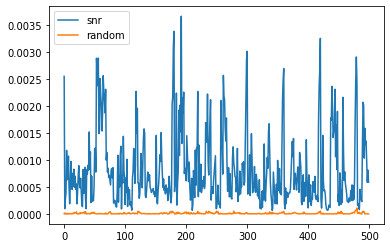

In [7]:
data = datasets.dataset("cw_loop5_fixedinput")

trace = lascar.TraceBatchContainer(data['trace'], data)
engines = [
    lascar.SnrEngine(
        name="snr",
        partition_function=lambda value: value["key"][0],
        partition_range=range(256),
    ),
    lascar.SnrEngine(
        name="random",
        partition_function=lambda value: random.randint(0, 1),
        partition_range=range(2),
    ),
]

session = lascar.Session(
    trace,
    engines=engines,
    output_method=lascar.MatPlotLibOutputMethod(*engines, single_plot=True, legend=True),
    progressbar=False,
)
session.run(batch_size=100_000)
